In [1]:
from google.colab import files
uploaded = files.upload()

Saving biased_gender_loans (1).csv to biased_gender_loans (1).csv


In [2]:
# Step 1: Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import r2_score, mean_squared_error

In [3]:
# Step 2: Load dataset
df = pd.read_csv("biased_gender_loans (1).csv")  # adjust path if needed
print("Dataset loaded successfully!")
print(df.head())

Dataset loaded successfully!
   salary  years_exp    sex bank_loan
0    1107         19  Woman        No
1    1267         10  Woman        No
2     896         19  Woman        No
3    1226         16  Woman        No
4    1207         19  Woman        No


In [4]:
# Step 3: Encode categorical columns (if any)
# We'll automatically encode all object-type columns
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

print("\nEncoded dataset preview:")
print(df.head())


Encoded dataset preview:
   salary  years_exp  sex  bank_loan
0    1107         19    1          0
1    1267         10    1          0
2     896         19    1          0
3    1226         16    1          0
4    1207         19    1          0


In [5]:
# Step 4: Separate features (X) and target (y)
# Assuming the target column is named 'bank_loan' or similar
target_col = 'bank_loan'
X = df.drop(columns=[target_col])
y = df[target_col]

In [6]:
# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Step 6: Train Linear Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [9]:
import shap
# Create SHAP explainer
explainer = shap.Explainer(model, X_train)

In [10]:
shap_values = explainer(X_test)

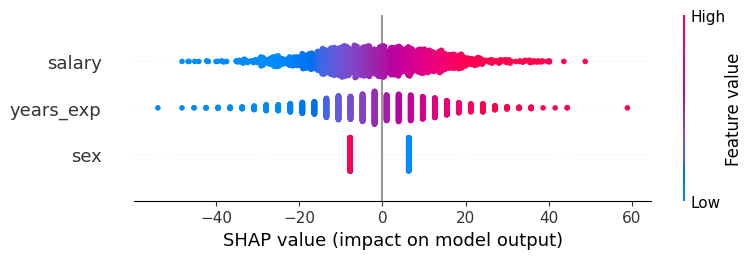

In [11]:
shap.summary_plot(shap_values, X_test)

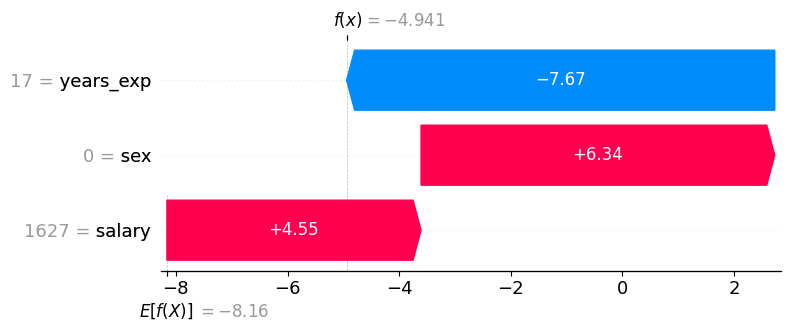

In [12]:
# Pick one instance (say, 5th sample)
shap.plots.waterfall(shap_values[5])

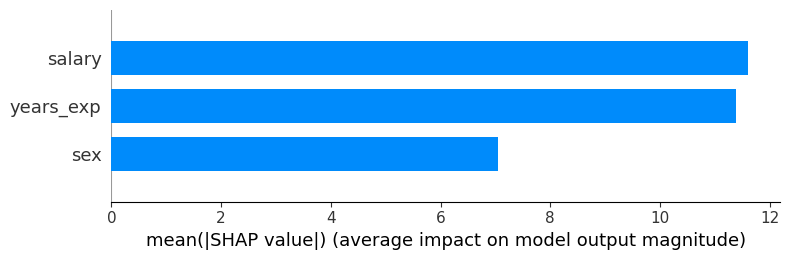

In [13]:
shap.summary_plot(shap_values, X_test, plot_type="bar")
